# Testing GT catalogue load

Objectives:
    1. Test GT simulation waveform loaded through nrc-catalogue-tools.

## Load the library

In [2]:
import sys

#p1 = "/home/vaishakp/Codes/custom_libraries/nr-catalog-tools"
libpath = '/mnt/pfs/vaishak.p/Projects/Codes/custom_libraries/nr-catalog-tools'

if libpath not in sys.path:
    sys.path.append(libpath)

print(sys.path)

['/mnt/pfs/vaishak.p/Projects/Codes/custom_libraries/nr-catalog-tools/test/notebooks', '/mnt/pfs/vaishak.p/soft/mpi4py-3.1.4/lib/python3.9/site-packages/mpi4py', '/mnt/pfs/vaishak.p/Projects/Codes/custom_libraries/waveformtools', '/mnt/pfs/vaishak.p/Projects/Codes/custom_libraries/qlmtools', '/mnt/pfs/vaishak.p/Projects/Codes/custom_libraries/config', '/mnt/pfs/vaishak.p/Projects/Codes/custom_libraries/nr-catalog-tools/test/notebooks', '/mnt/pfs/vaishak.p/soft/anaconda3/envs/nrcat_pip/lib/python310.zip', '/mnt/pfs/vaishak.p/soft/anaconda3/envs/nrcat_pip/lib/python3.10', '/mnt/pfs/vaishak.p/soft/anaconda3/envs/nrcat_pip/lib/python3.10/lib-dynload', '', '/mnt/pfs/vaishak.p/soft/anaconda3/envs/nrcat_pip/lib/python3.10/site-packages', '/mnt/pfs/vaishak.p/Projects/Codes/custom_libraries/nr-catalog-tools']


## Display the environment

In [3]:
%%bash
python --version
conda info --envs | grep '*'

Python 3.10.10
nrcat_pip             *  /mnt/pfs/vaishak.p/soft/anaconda3/envs/nrcat_pip


# Method I : through nr-catalogue-tools

In [4]:
import nrcatalogtools

No version information file '.version' found


In [5]:
import nrcatalogtools.lvc as lalutils

In [6]:
from nrcatalogtools.lvc import get_lal_mode_dictionary_from_lmax
#from nrcatalogtools.rit import RITCatalog
from nrcatalogtools.maya import MayaCatalog
from nrcatalogtools import utils
from nrcatalogtools.waveform import WaveformModes

In [7]:
import numpy as np
import sxs
import matplotlib.pyplot as plt

In [8]:
# View SXS cache
sxs.sxs_directory("cache")

PosixPath('/home/vaishak.p/.cache/sxs')

### MAYA cat details

In [9]:
nrcatalogtools.utils.maya_catalog_info

{'cache_dir': PosixPath('/home/vaishak.p/.cache/MAYA'),
 'url': 'https://raw.githubusercontent.com/cevans216/gt-waveform-catalog/master/h5files',
 'metadata_url': 'https://raw.githubusercontent.com/cevans216/gt-waveform-catalog/master/catalog-table.txt',
 'data_dir': PosixPath('/home/vaishak.p/.cache/MAYA/data'),
 'metadata_dir': PosixPath('/home/vaishak.p/.cache/MAYA/metadata'),
 'data_url': 'https://raw.githubusercontent.com/cevans216/gt-waveform-catalog/master/h5files'}

In [60]:
# Simulation name
sim_name = 'GT0016'

# Parameters
M = 40
D = 1000
inc = np.pi/6
coa_phase = np.pi/4
delta_t = 1./2048

## Load waveform

..As data does not exist in cache:  (in /home/vaishak.p/.cache/MAYA/data/GT0016.h5),
..we will now download it from https://raw.githubusercontent.com/cevans216/gt-waveform-catalog/master/h5files/GT0016.h5
...writing to cache: /home/vaishak.p/.cache/MAYA/data/GT0016.h5
...downloading https://raw.githubusercontent.com/cevans216/gt-waveform-catalog/master/h5files/GT0016.h5


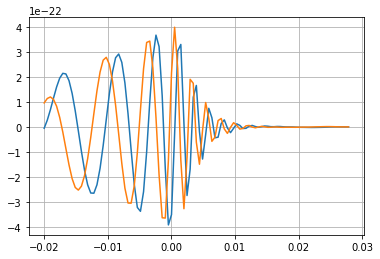

In [61]:
#sc = sxs.Catalog.load(download=True)
#rc = RITCatalog.load(verbosity=5, download=True)
mc = MayaCatalog.load(verbosity=5)

mwf = mc.get(sim_name)
hpc = mwf.get_td_waveform(total_mass=M, distance=D, inclination=inc,
                    coa_phase=coa_phase, delta_t=delta_t
                    )
hpc_pycbc = hpc # mwf.to_pycbc(hpc)
hp, hc = hpc_pycbc.real(), hpc_pycbc.imag()

plt.plot(hp.sample_times, hp)
plt.plot(hc.sample_times, hc)
plt.grid()
plt.show()

# Method II :

Using [the script](https://github.com/cevans216/gt-waveform-catalog/tree/master/scripts)

In [62]:
# Lal path
lal.__file__

'/mnt/pfs/vaishak.p/soft/anaconda3/envs/nrcat_pip/lib/python3.10/site-packages/lal/__init__.py'

## Original script, no changes

In [63]:
import h5py
import lal
import lalsimulation as lalsim
from pycbc import pnutils
from matplotlib import pyplot
import numpy

file = f'{fdir}/data/GT0001.h5'

f = h5py.File(file, 'r')

params = {}

# Extrinsic parameters:

params['f_lower'] = 20.0
params['mtotal'] = 150.0
params['inclination'] = 0.0
params['distance'] = 100.0

# Metadata parameters:

params['eta'] = f.attrs['eta']

params['mass1'] = pnutils.mtotal_eta_to_mass1_mass2(params['mtotal'], params['eta'])[0]
params['mass2'] = pnutils.mtotal_eta_to_mass1_mass2(params['mtotal'], params['eta'])[1]

params['spin1x'] = f.attrs['spin1x']
params['spin1y'] = f.attrs['spin1y']
params['spin1z'] = f.attrs['spin1z']
params['spin2x'] = f.attrs['spin2x']
params['spin2y'] = f.attrs['spin2y']
params['spin2z'] = f.attrs['spin2z']


params['coa_phase'] = f.attrs['coa_phase']

    
f.close()

#
dt = 1.0/4096.0

from pycbc.waveform import get_td_waveform

hp, hc = get_td_waveform(approximant='NR_hdf5',
                         numrel_data=file,
                         mass1=params['mass1'],
                         mass2=params['mass2'],
			 spin1x=params['spin1x'],
			 spin1y=params['spin1y'],
                         spin1z=params['spin1z'],
			 spin2x=params['spin2x'],
                         spin2y=params['spin2y'],
			 spin2z=params['spin2z'],
                         delta_t=dt,
                         f_lower=30.0,
                         inclination=params['inclination'],
                         coa_phase=params['coa_phase'],
                         distance=params['distance'])

#
t = numpy.array(range( len(hp) ) )*dt
pyplot.figure()
pyplot.plot( t, hp, color=[0,0.7071,1] )
pyplot.show()


KeyError: "Can't open attribute (can't locate attribute: 'coa_phase')"

Here, `coa_phase` is missing from h5 file's attributes. Correcting for this and loading the same simulation as in the catalogue load, 

In [66]:
import h5py
import lal
import lalsimulation as lalsim
from pycbc import pnutils



fdir = nrcatalogtools.utils.maya_catalog_info['cache_dir']
file = f'{fdir}/data/{sim_name}.h5'

# Check by changing spin by small amount
#dspins2x = np.linspace(-0.1, 0.1, 1000)

f = h5py.File(file, 'r')
print(f.attrs.keys())
#print(f.keys())
params = {}

# Extrinsic parameters:
f_lower = 20
params['f_lower'] = f_lower
params['mtotal'] = M#150.0
params['inclination'] = inc#0.0
params['distance'] = D#100.0

# Metadata parameters:

params['eta'] = f.attrs['eta']

params['mass1'] = pnutils.mtotal_eta_to_mass1_mass2(params['mtotal'], params['eta'])[0]
params['mass2'] = pnutils.mtotal_eta_to_mass1_mass2(params['mtotal'], params['eta'])[1]

# BH1 spins
params['spin1x'] = f.attrs['spin1x']
params['spin1y'] = f.attrs['spin1y']
params['spin1z'] = f.attrs['spin1z']


# BH2 spins

#for dspin2x in dspins2x:

#print(spin2x)
params['spin2x'] = f.attrs['spin2x']
params['spin2y'] = f.attrs['spin2y']
params['spin2z'] = f.attrs['spin2z']

# Check for coa_phase, else use the phase from nr cat load.
try:
    params['coa_phase'] = f.attrs['coa_phase']
except:
    print(f'Cannot find the attribute `coa_phase` in the file. Setting to {coa_phase}')
    #raise AttributeError('Cannot find the attribute `coa_phase` in the file')
    params['coa_phase']=coa_phase

from pycbc.waveform import get_td_waveform


print('Loading waveform')
hp, hc = get_td_waveform(approximant='NR_hdf5',
                         numrel_data=file,
                         mass1=params['mass1'],
                         mass2=params['mass2'],
                         spin1x=params['spin1x'],
                         spin1y=params['spin1y'],
                         spin1z=params['spin1z'],
                         spin2x=params['spin2x'],
                         spin2y=params['spin2y'],
                         spin2z=params['spin2z'],
                         delta_t=delta_t,
                         f_lower=f_lower,
                         inclination=params['inclination'],
                         coa_phase=params['coa_phase'],
                         distance=params['distance'])

#
t = numpy.array(range( len(hp) ) )*delta_t

#pyplot.figure()
plt.plot(t, hp, color=[0,0.7071,1])
plt.show()
#f.close()

<KeysViewHDF5 ['Contact Person', 'Format', 'INSPIRE-bibtex-keys', 'LNhatx', 'LNhaty', 'LNhatz', 'Lmax', 'NR-code', 'NR-group', 'NR-techniques', 'Omega', 'PN_approximant', 'Warning1', 'alternative-names', 'comparable-simulation', 'eccentricity', 'eta', 'files-in-error-series', 'horizon_mass1', 'horizon_mass2', 'init_sep', 'license', 'mean_anomaly', 'modification-date', 'name', 'nhatx', 'nhaty', 'nhatz', 'number_of_orbits', 'object1', 'object2', 'point-of-contact-email', 'production-run', 'puncture_mass1', 'puncture_mass2', 'simulation-type', 'spin1x', 'spin1y', 'spin1z', 'spin2x', 'spin2y', 'spin2z', 'type']>
Cannot find the attribute `coa_phase` in the file. Setting to 0.7853981633974483
Loading waveform


XLAL Error - XLALSimIMRNRWaveformGetModes (LALSimIMRNRWaveforms.c:706): SPIN1X IS INCONSISTENT WITH THE NR SIMULATION.

XLAL Error - XLALSimIMRNRWaveformGetModes (LALSimIMRNRWaveforms.c:706): Input domain error
XLAL Error - XLALSimInspiralNRWaveformGetHplusHcross (LALSimIMRNRWaveforms.c:954): Internal function call failed: Input domain error
XLAL Error - XLALSimInspiralChooseTDWaveform (LALSimInspiral.c:1232): Internal function call failed: Input domain error


RuntimeError: Internal function call failed: Input domain error

In [67]:
params

{'f_lower': 20,
 'mtotal': 40,
 'inclination': 0.5235987755982988,
 'distance': 1000,
 'eta': 0.25,
 'mass1': 20.0,
 'mass2': 20.0,
 'spin1x': -0.14140294,
 'spin1y': -0.0,
 'spin1z': 0.14140202,
 'spin2x': -0.20002835,
 'spin2y': -0.0,
 'spin2z': 1e-07,
 'coa_phase': 0.7853981633974483}

In [16]:
print(f.keys())

<KeysViewHDF5 ['amp_l2_m-1', 'amp_l2_m-2', 'amp_l2_m0', 'amp_l2_m1', 'amp_l2_m2', 'amp_l3_m-1', 'amp_l3_m-2', 'amp_l3_m-3', 'amp_l3_m0', 'amp_l3_m1', 'amp_l3_m2', 'amp_l3_m3', 'amp_l4_m-1', 'amp_l4_m-2', 'amp_l4_m-3', 'amp_l4_m-4', 'amp_l4_m0', 'amp_l4_m1', 'amp_l4_m2', 'amp_l4_m3', 'amp_l4_m4', 'amp_l5_m-1', 'amp_l5_m-2', 'amp_l5_m-3', 'amp_l5_m-4', 'amp_l5_m-5', 'amp_l5_m0', 'amp_l5_m1', 'amp_l5_m2', 'amp_l5_m3', 'amp_l5_m4', 'amp_l5_m5', 'amp_l6_m-1', 'amp_l6_m-2', 'amp_l6_m-3', 'amp_l6_m-4', 'amp_l6_m-5', 'amp_l6_m-6', 'amp_l6_m0', 'amp_l6_m1', 'amp_l6_m2', 'amp_l6_m3', 'amp_l6_m4', 'amp_l6_m5', 'amp_l6_m6', 'auxiliary-info', 'phase_l2_m-1', 'phase_l2_m-2', 'phase_l2_m0', 'phase_l2_m1', 'phase_l2_m2', 'phase_l3_m-1', 'phase_l3_m-2', 'phase_l3_m-3', 'phase_l3_m0', 'phase_l3_m1', 'phase_l3_m2', 'phase_l3_m3', 'phase_l4_m-1', 'phase_l4_m-2', 'phase_l4_m-3', 'phase_l4_m-4', 'phase_l4_m0', 'phase_l4_m1', 'phase_l4_m2', 'phase_l4_m3', 'phase_l4_m4', 'phase_l5_m-1', 'phase_l5_m-2', 'phase

In [17]:
print(f.attrs.keys())

<KeysViewHDF5 ['Contact Person', 'Format', 'INSPIRE-bibtex-keys', 'LNhatx', 'LNhaty', 'LNhatz', 'Lmax', 'NR-code', 'NR-group', 'NR-techniques', 'Omega', 'PN_approximant', 'Warning1', 'alternative-names', 'comparable-simulation', 'eccentricity', 'eta', 'files-in-error-series', 'horizon_mass1', 'horizon_mass2', 'init_sep', 'license', 'mean_anomaly', 'modification-date', 'name', 'nhatx', 'nhaty', 'nhatz', 'number_of_orbits', 'object1', 'object2', 'point-of-contact-email', 'production-run', 'puncture_mass1', 'puncture_mass2', 'simulation-type', 'spin1x', 'spin1y', 'spin1z', 'spin2x', 'spin2y', 'spin2z', 'type']>


In [23]:
f.attrs['spin2x']

-0.20003875

In [65]:
f.attrs['spin1x']

-0.14140294